# Análisis de datos de empresas de taxi



 ## 1. Objetivo del análisis:
  - Identificar las empresas de taxi top según su número de viajes.
  - Identificar los 10 principales barrios con más viajes finalizados en promedio.
  - Evaluar si los sábados lluviosos tienen un impacto significativo en la duración promedio de los viajes realizados desde el Loop hacia el Aeropuerto Internacional O'Hare.


## 2. Diccionario de datos

2.1. `project_sql_result_01.csv`:

 - `company_name`: nombre de la empresa de taxis

 - `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

2.2. `project_sql_result_04.csv`:

 - `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes

 - `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

2.3. `project_sql_result_07.csv`: Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados del mes de noviembre del año 2017:

 - `start_ts`: fecha y hora de la recogida
 - `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
 - `duration_seconds`: duración del viaje en segundos

## 3. Descripción de los datos:

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
# Cargar el dataset
from google.colab import files
uploaded = files.upload()

Saving moved_project_sql_result_07.csv to moved_project_sql_result_07 (1).csv
Saving moved_project_sql_result_04.csv to moved_project_sql_result_04 (1).csv
Saving moved_project_sql_result_01.csv to moved_project_sql_result_01.csv


In [4]:
# Cargar los archivos CSV
df_trips = pd.read_csv("moved_project_sql_result_01.csv")
df_locations = pd.read_csv("moved_project_sql_result_04.csv")
df_loop_ohare = pd.read_csv("moved_project_sql_result_07.csv")

In [5]:
# Vista previa de DataFrames
print(df_trips.head())
print()
print(df_locations.head())
print()
print(df_loop_ohare.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [6]:
# Revisión de tipo de datos
print(df_trips.info())
print()
print(df_locations.info())
print()
print(df_loop_ohare.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2  

### 3.1. Conclusiones del análisis preliminar del Dataset:
 - Los Dataframes `df_trips` y `df_locations` tienen los tipos de datos correctos:
  - `company_name` y `dropoff_location_name` son tipo objeto.
  - `trips_amount` es entero y
  - `average_trips` es flotante.

 - El Dataframe `df_loop_ohare` tiene los siguientes tipos de datos:
  - `start_ts` es tipo objeto, se deberá tranformar a tipo datetime
  - `weather_conditions` y `duration_seconds` tienen el tipo de datos correcto, objeto y flotante correspondientemente.

 - No hay valores nulos en ninguno de los DataFrames.

## 4. Etapa 2. Procesamiento de datos:

In [8]:
# Convertir a datetime
df_loop_ohare["start_ts"] = pd.to_datetime(df_loop_ohare["start_ts"])
print(df_loop_ohare["start_ts"].dtype)

datetime64[ns]


In [10]:
# Verificar duplicados en los Dataframes
print(df_trips.duplicated().sum())
print(df_locations.duplicated().sum())
print(df_loop_ohare.duplicated().sum())

0
0
197


Hay 197 filas duplicadas en el DataFrame `df_loop_ohare`

In [11]:
# Eliminación de duplicados explícitos en `df_loop_ohare`
df_loop_ohare = df_loop_ohare.drop_duplicates()
print(df_loop_ohare.duplicated().sum())

0


In [13]:
# Verificar valores nulos
print(df_trips.isna().sum())
print()
print(df_locations.isna().sum())
print()
print(df_loop_ohare.isna().sum())

company_name    0
trips_amount    0
dtype: int64

dropoff_location_name    0
average_trips            0
dtype: int64

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


## 5. Etapa 3: Análisis exploratorio de datos (EDA)

### 5.1. Identificar los 10 barrios con mayor promedio de finalización de viajes

In [ ]:
# Top 10 barrios con mayor promedio de viajes finalizados
top10_locations = df_locations.sort_values(by="average_trips", ascending=False).head(10)
print(top10_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### 5.2. Gráfico del promedio de finalizaciones en los 10 barrios principales.

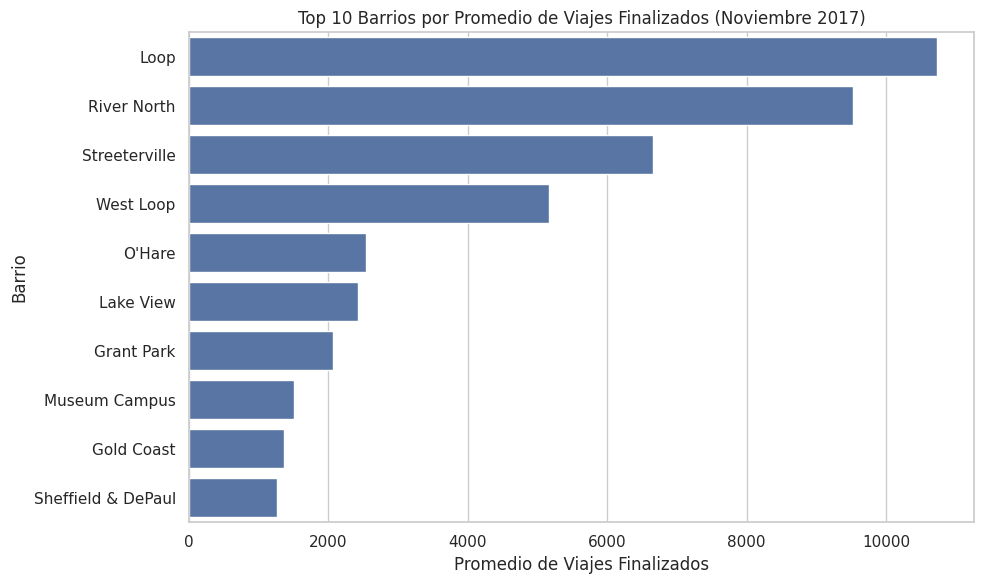

In [ ]:
# Gráfico: Finalización de viajes por barrio
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="average_trips", y="dropoff_location_name", data=top10_locations)
plt.title("Top 10 Barrios por Promedio de Viajes Finalizados (Noviembre 2017)", fontsize=12)
plt.xlabel("Promedio de Viajes Finalizados")
plt.ylabel("Barrio")
plt.tight_layout()
plt.show()

### 5.3. Gráfico de número de viajes por empresa de taxis.

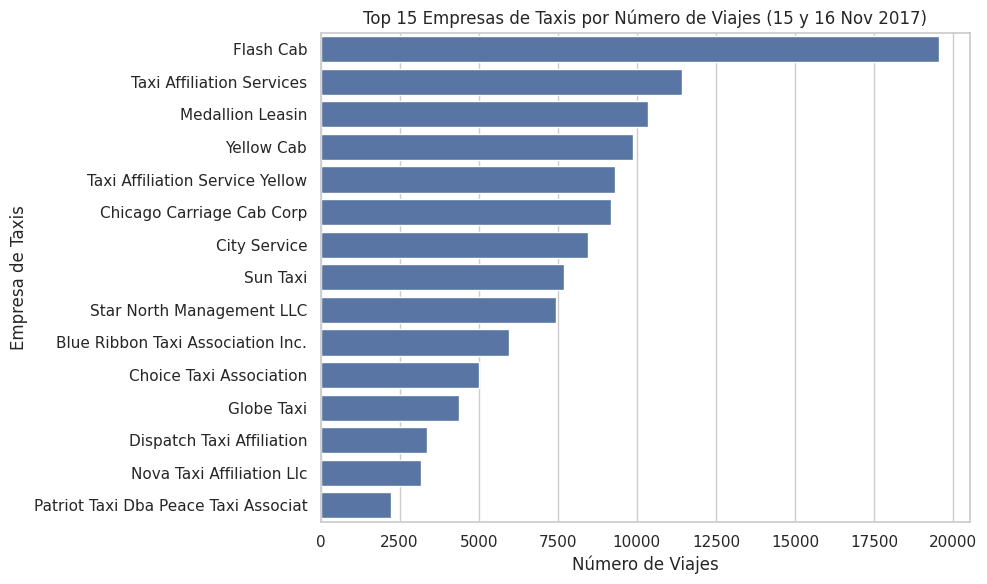

In [ ]:
# Gráfico: Viajes por empresa
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df_trips_sorted = df_trips.sort_values(by="trips_amount", ascending=False).head(15)
sns.barplot(x="trips_amount", y="company_name", data=df_trips_sorted)
plt.title("Top 15 Empresas de Taxis por Número de Viajes (15 y 16 Nov 2017)", fontsize=12)
plt.xlabel("Número de Viajes")
plt.ylabel("Empresa de Taxis")
plt.tight_layout()
plt.show()

### 5.4. Conclusiones:

 - Barrios como Loop, River North y Streeterville tienen entre 6000 y 11000 promedio de viajes finalizados, estos son focos clave de actividad, probablemente tienen muchas atracciones turísticas o zonas comerciales.
 - Flash Cab fue la empresa con mayor actividad el 15 y 16 de noviembre del 2017.
 - Hubo una alta competencia entre entre las 8 siguientes empresas de taxis, que tienen un número de viajes entre 7500 y 12500.
 - Las empresas con pocos viajes (menos de 6000 viajes) pueden ser más nuevas o tener menos presencia.

## 6. Etapa 4: Prueba de hipótesis

Evaluar si los sábados lluviosos tienen un impacto significativo en la duración promedio de los viajes realizados desde el Loop hacia el Aeropuerto Internacional O'Hare.

- Hipótesis:
 - Hipótesis nula (H₀): La duración promedio de los viajes no cambia los sábados lluviosos.
 - Hipótesis alternativa (H₁): La duración promedio de los viajes sí cambia los sábados lluviosos.

- Metodología:
 - Se dividirá en dos grupos:
   - Sábados lluviosos
   - Sábados sin lluvia
 - Se aplicará una prueba t de Student para muestras independientes con un nivel de significancia α = 0.05.



In [16]:
# Vista previa del DataFrame df_loop_ohare
print(df_loop_ohare.head())
print()
print(df_loop_ohare.info())

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None


In [17]:
# Verificar valores únicos en la columna weather_conditions
print(df_loop_ohare["weather_conditions"].unique())

['Good' 'Bad']


Existen 2 valores en la columna weather_conditions:
 - Grupo 1: sábados lluviosos (weather_conditions == 'Bad')
 - Grupo 2: sábados sin lluvia (weather_conditions != 'Bad')

In [20]:
# Separar en sábados lluviosos (== 'Bad') y sábados con buen clima (!= 'Bad')
rainy_saturdays = df_loop_ohare[df_loop_ohare["weather_conditions"] == "Bad"]
dry_saturdays = df_loop_ohare[df_loop_ohare["weather_conditions"] != "Bad"]

In [21]:
# Ver cuántos viajes hay en cada grupo
print('Número de viajes en sábados lluviosos:', rainy_saturdays.shape[0])
print('Número de viajes en sábados sin lluva:', dry_saturdays.shape[0])

Número de viajes en sábados lluviosos: 148
Número de viajes en sábados sin lluva: 723


Tenemos:

 - 148 viajes realizados en sábados lluviosos (weather_conditions == 'Bad').
 - 723 viajes realizados en otros sábados (con clima no lluvioso).

Ahora aplicaremos la prueba t de Student para comparar las medias de duración de viaje entre ambos grupos.

<ipython-input-28-44c374797ca3>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


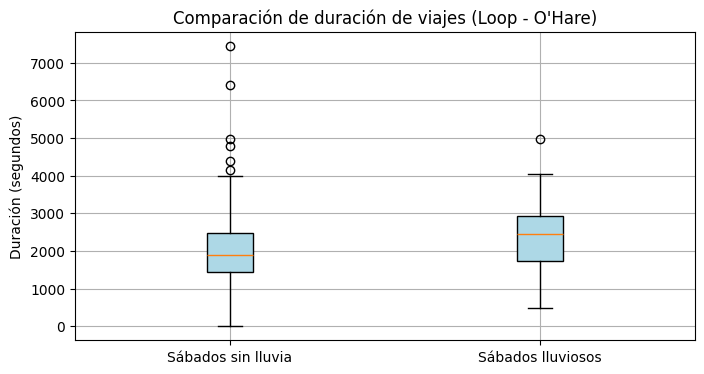

In [28]:
# Verificación de outliers en la columna duration_seconds
# Crear gráfico boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(
    [dry_saturdays["duration_seconds"], rainy_saturdays["duration_seconds"]],
    labels=["Sábados sin lluvia", "Sábados lluviosos"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"))
plt.title("Comparación de duración de viajes (Loop - O'Hare)")
plt.ylabel("Duración (segundos)")
plt.grid(True)
plt.show()

Se observa valores atípicos en los días Sábados sin lluvia, los eliminaré para el análisis estadístico.

In [29]:
# Eliminación de outliers del conjunto de datos
# Cálculo de cuartiles y IQR
q1 = dry_saturdays["duration_seconds"].quantile(0.25)
q3 = dry_saturdays["duration_seconds"].quantile(0.75)
iqr = q3 - q1

# Definir límites
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [30]:
# Filtrar los datos para eliminar outliers
dry_saturdays = dry_saturdays[(dry_saturdays["duration_seconds"] >= lower_bound) & (dry_saturdays["duration_seconds"] <= upper_bound)]

In [31]:
# Prueba de levene para comparar varianzas
levene_test = st.levene(dry_saturdays["duration_seconds"], rainy_saturdays["duration_seconds"])
p_value_levene = levene_test.pvalue
print("Valor p:", p_value_levene)

# Determinar si las varianzas son iguales o no
equal_var = p_value_levene > 0.05
print("Las varianzas son iguales:", equal_var)

Valor p: 0.549846596330148
Las varianzas son iguales: True


In [33]:
# Hipótesis nula (H₀): La duración promedio de los viajes no cambia los sábados lluviosos.
# Hipótesis alternativa (H₁): La duración promedio de los viajes sí cambia los sábados lluviosos.

# Definir nivel de alpha
alpha = 0.05

# Ejecutar prueba t
results = st.ttest_ind(
    rainy_saturdays["duration_seconds"],
    dry_saturdays["duration_seconds"],
    equal_var=True)

print("Valor p:", results.pvalue)

# Interpretación
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. La duración promedio sí cambia los sábados lluviosos.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente de diferencia.")

Valor p: 5.278242960569139e-10
Rechazamos la hipótesis nula. La duración promedio sí cambia los sábados lluviosos.


Concluimos que la lluvia los sábados tiene un efecto estadísticamente significativo en la duración promedio de los viajes desde el Loop hacia el aeropuerto.

## 7. Conclusiiones generales

- Los resultados sugieren que los sábados lluviosos prolongan la duración de los viajes, posiblemente por mayor tráfico, condiciones de manejo más lentas o demoras en el transporte.
- Flash Cab fue la empresa con mayor actividad el 15 y 16 de noviembre de 2017.
- Hubo una alta competencia el 15 y 16 de noviembre entre las empresas Taxi Affiliation Services, Medallion Leasin, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriahe Cab Corp, City Service, Sun Taxi y star North Management LLC.
- Barrios como Loop, River North y Streeterville tienen entre 6000 y 11000 promedio de viajes finalizados, estos son focos clave de actividad, probablemente tienen muchas atracciones turísticas o zonas comerciales.




## 8. Recomendaciones:

 - La empresa Flash Cab tuvo una fuerte presencia en el mercado el 15 y 16 de novimebre de 2017.
 - Se puede planificar estrategias de operación o marketing en los barrios de alta demanda como Loop, River North y Streeterville.
 - Los resultados sugieren que los sábados lluviosos prolongan la duración de los viajes, posiblemente por mayor tráfico, condiciones de manejo más lentas o demoras en el transporte.
 - Se puede planificar de rutas y tiempos estimados para los días lluviosos.
